In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('kapsel_song_data/labels.csv')
df.head()

,map_id,judul,label,genre
0,1,Surat Cinta - Vina Panduwinata,Bahagia,Pop
1,2,"Ya Sudahlah - Bondan Prakoso, Fade2Black",Bahagia,Pop / Rock
2,3,Kenangan Terindah - SAMSONS,Sedih,Pop / Rock
3,4,Salam Rindu - Tipe-X,Bahagia,Pop
4,5,I Love U Bibeh - The Changcuters,Bahagia,Pop / Rock


In [3]:
df['artist'] = df['judul'].apply(lambda x: x.split(' - '))
df['judul'] = df['artist'].apply(lambda x: x[0])
df['artist'] = df['artist'].apply(lambda x: x[1])
# ganti colom judul jadi title
df.rename(columns={'judul': 'title'}, inplace=True)
df.head()

,map_id,title,label,genre,artist
0,1,Surat Cinta,Bahagia,Pop,Vina Panduwinata
1,2,Ya Sudahlah,Bahagia,Pop / Rock,"Bondan Prakoso, Fade2Black"
2,3,Kenangan Terindah,Sedih,Pop / Rock,SAMSONS
3,4,Salam Rindu,Bahagia,Pop,Tipe-X
4,5,I Love U Bibeh,Bahagia,Pop / Rock,The Changcuters


In [4]:
lyrics = []
for i in range(len(df)):
     with open('kapsel_song_data/lyrics/full-{}.txt'.format(df["map_id"][i]), 'r') as file:
          lyrics.append(file.read())
df['lyrics'] = lyrics
del lyrics

In [5]:
df.head()

,map_id,title,label,genre,artist,lyrics
0,1,Surat Cinta,Bahagia,Pop,Vina Panduwinata,hari ini ku gembira melangkah di udara\npak po...
1,2,Ya Sudahlah,Bahagia,Pop / Rock,"Bondan Prakoso, Fade2Black",Ketika mimpimu yang begitu indah\nTak pernah t...
2,3,Kenangan Terindah,Sedih,Pop / Rock,SAMSONS,Aku yang lemah tanpamu\nAku yang rentan karena...
3,4,Salam Rindu,Bahagia,Pop,Tipe-X,Saat bulan purnama bersinar\nTerangi malamku t...
4,5,I Love U Bibeh,Bahagia,Pop / Rock,The Changcuters,Biar kata nenek sihir\nBagiku kau Britney Spea...


In [6]:
from pymilvus import model

sentence_transformer_ef = model.dense.SentenceTransformerEmbeddingFunction(
    model_name='all-MiniLM-L6-v2', # Specify the model name
    device='cpu' # Specify the device to use, e.g., 'cpu' or 'cuda:0'
)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [7]:
vector = sentence_transformer_ef.encode_documents(df['lyrics'].tolist())

print("Dim:", sentence_transformer_ef.dim , "Shape:", vector[0].shape)

Dim: 384 Shape: (384,)


In [8]:
data = [
     {
          "id": df["map_id"][i],
          "vector": vector[i].tolist(),
          "title": df["title"][i],
          "artist": df["artist"][i],
          "label": df["label"][i],
          "genre": df["genre"][i],
          "lyric": df["lyrics"][i],
     }
     for i in range(len(df))
]

print("Data has", len(data), "entities, each with fields: ", data[0].keys())
print("Vector dim:", len(data[0]["vector"]))

Data has 340 entities, each with fields:  dict_keys(['id', 'vector', 'title', 'artist', 'label', 'genre', 'lyric'])
Vector dim: 384


In [9]:
from pymilvus import MilvusClient

client = MilvusClient("milvus_demo.db")


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [10]:
client.create_collection(
    collection_name="song_lyrics",
    dimension=384,  # The vectors we will use in this demo has 768 dimensions
)

In [11]:
res = client.insert(collection_name="song_lyrics", data=data)

print(res)

{'insert_count': 340, 'ids': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216

In [12]:
import time

In [13]:
res = client.list_indexes(collection_name="song_lyrics")
     
print(res)

['vector']


In [30]:
dict_time = {}

## Query 1

In [33]:
start_time = time.time()
res = client.query(
    collection_name="song_lyrics",
    filter='title like "Cinta"',
    output_fields=["artist","title"],
    limit=3
)
end_time = time.time()
print("Time:", end_time - start_time)
dict_time["query1-sebelum"] = end_time - start_time

print(res)

Time: 0.011325836181640625
data: ["{'id': 127, 'title': 'Cinta', 'artist': 'Naura ayu'}"] , extra_info: {'cost': 0}


In [34]:
search_params_optimized = {"metric_type": "L2", "params": {"ef": 100}}

start_time = time.time()
res = client.query(
    collection_name="song_lyrics",
    filter='title like "Cinta"',
    output_fields=["artist","title"],
    limit=3,
    params=search_params_optimized
)
end_time = time.time()
print("Time:", end_time - start_time)
dict_time["query1-sesudah"] = end_time - start_time

print(res)

Time: 0.007642984390258789
data: ["{'id': 127, 'title': 'Cinta', 'artist': 'Naura ayu'}"] , extra_info: {'cost': 0}


## Query 2

In [36]:
query_vectors = sentence_transformer_ef.encode_queries(["Mimpi"])

start_time = time.time()
res = client.search(
    collection_name="song_lyrics",  # target collection
    data=query_vectors,  # query vectors
    limit=5,  # number of returned entities
    output_fields=["title","artist","genre"],  # specifies fields to be returned
)
end_time = time.time()
print("Search time:", end_time - start_time)
dict_time["query2-sebelum"] = end_time - start_time

for i in res[0]:
     print(i)

Search time: 0.0021088123321533203
{'id': 72, 'distance': 0.3156123161315918, 'entity': {'title': 'Jauh mimpiku', 'artist': 'peterpan', 'genre': 'pop'}}


### setelah optimasi

In [37]:
search_params_optimized = {"metric_type": "L2", "params": {"ef": 100}}

query_vectors = sentence_transformer_ef.encode_queries(["Mimpi"])

start_time = time.time()
res = client.search(
    collection_name="song_lyrics",  # target collection
    data=query_vectors,  # query vectors
    limit=5,  # number of returned entities
    output_fields=["title","artist","genre"],  # specifies fields to be returned
    params=search_params_optimized
)
end_time = time.time()
print("Search time:", end_time - start_time)
dict_time["query2-sesudah"] = end_time - start_time

for i in res[0]:
     print(i)

Search time: 0.0019168853759765625
{'id': 72, 'distance': 0.3156123161315918, 'entity': {'title': 'Jauh mimpiku', 'artist': 'peterpan', 'genre': 'pop'}}


## Query 3

In [38]:
query_vectors = sentence_transformer_ef.encode_queries(["pergi jauh"])

start_time = time.time()
res = client.search(
    collection_name="song_lyrics",  # target collection
    data=query_vectors,  # query vectors
    filter="genre like '%pop%'",  # filter condition
    limit=5,  # number of returned entities
    output_fields=["title","artist","genre"],  # specifies fields to be returned
)
end_time = time.time()
print("Search time:", end_time - start_time)
dict_time["query3-sebelum"] = end_time - start_time

for i in res[0]:
     print(i)

Search time: 0.007138967514038086
{'id': 73, 'distance': 0.29455041885375977, 'entity': {'title': 'Walau habis terang', 'artist': 'peterpan', 'genre': 'pop'}}


### setelah optimasi

In [39]:
search_params_optimized = {"metric_type": "L2", "params": {"ef": 100}}

query_vectors = sentence_transformer_ef.encode_queries(["pergi jauh"])

start_time = time.time()
res = client.search(
    collection_name="song_lyrics",  # target collection
    data=query_vectors,  # query vectors
    filter="genre like '%pop%'",  # filter condition
    limit=5,  # number of returned entities
    output_fields=["title","artist","genre"],  # specifies fields to be returned
    params=search_params_optimized
)
end_time = time.time()
print("Search time:", end_time - start_time)
dict_time["query3-sesudah"] = end_time - start_time

for i in res[0]:
     print(i)

Search time: 0.005026102066040039
{'id': 73, 'distance': 0.29455041885375977, 'entity': {'title': 'Walau habis terang', 'artist': 'peterpan', 'genre': 'pop'}}


## Query 4

In [40]:
query_vectors = sentence_transformer_ef.encode_queries(["semangat"])

start_time = time.time()
res = client.search(
    collection_name="song_lyrics",  # target collection
    data=query_vectors,  # query vectors
    filter="label like 'Bahagia'",  # filter condition
    limit=10,  # number of returned entities
    output_fields=["title","artist","label"],  # specifies fields to be returned
)
end_time = time.time()
print("Search time:", end_time - start_time)
dict_time["query4-sebelum"] = end_time - start_time

for i in res[0]:
     print(i)

Search time: 0.0023670196533203125
{'id': 329, 'distance': 0.2360372692346573, 'entity': {'title': 'Penantian Berharga', 'artist': 'Rizky Febian', 'label': 'Bahagia'}}
{'id': 225, 'distance': 0.23331129550933838, 'entity': {'title': 'Selamat Pagi', 'artist': 'RAN', 'label': 'Bahagia'}}


In [42]:
search_params_optimized = {"metric_type": "Cosine", "params": {"ef": 100}}

query_vectors = sentence_transformer_ef.encode_queries(["semangat"])

start_time = time.time()
res = client.search(
    collection_name="song_lyrics",  # target collection
    data=query_vectors,  # query vectors
    filter="label like 'Bahagia'",  # filter condition
    limit=10,  # number of returned entities
    output_fields=["title","artist","label"],  # specifies fields to be returned
    params=search_params_optimized
)
end_time = time.time()
print("Search time:", end_time - start_time)
dict_time["query4-sesudah"] = end_time - start_time

for i in res[0]:
     print(i)

Search time: 0.002925872802734375
{'id': 329, 'distance': 0.2360372692346573, 'entity': {'title': 'Penantian Berharga', 'artist': 'Rizky Febian', 'label': 'Bahagia'}}
{'id': 225, 'distance': 0.23331129550933838, 'entity': {'title': 'Selamat Pagi', 'artist': 'RAN', 'label': 'Bahagia'}}


## Query 5

In [43]:
query_vectors = sentence_transformer_ef.encode_queries(["lagu tentang cinta"])

start_time = time.time()
res = client.search(
     collection_name="song_lyrics",  # target collection
     data=query_vectors,
     filter="artist like 'Dewa%'",
     limit=5,  # number of returned entities
     output_fields=["title","artist","genre"],  # specifies fields to be returned
     )
end_time = time.time()
print("Search time:", end_time - start_time)
dict_time["query5-sebelum"] = end_time - start_time

for i in res[0]:
     print(i)

Search time: 0.002599954605102539
{'id': 316, 'distance': 0.3986392915248871, 'entity': {'title': 'Risalah Hati', 'artist': 'Dewa', 'genre': 'Pop'}}


### setelah optimasi

In [54]:
search_params_optimized = {"metric_type": "L2", "params": {"ef": 100}}
query_vectors = sentence_transformer_ef.encode_queries(["lagu tentang cinta"])

start_time = time.time()
res = client.search(
     collection_name="song_lyrics",  # target collection
     data=query_vectors,
     filter="artist like 'Dewa%'",
     limit=5,  # number of returned entities
     output_fields=["title","artist","genre"],  # specifies fields to be returned
     params=search_params_optimized
     )
end_time = time.time()
print("Search time:", end_time - start_time)
dict_time["query5-sesudah"] = end_time - start_time

for i in res[0]:
     print(i)

Search time: 0.0024809837341308594
{'id': 316, 'distance': 0.3986392915248871, 'entity': {'title': 'Risalah Hati', 'artist': 'Dewa', 'genre': 'Pop'}}


## Query 6

In [55]:
query_vectors = sentence_transformer_ef.encode_queries(["lagu perjalanan"])

start_time = time.time()
res = client.search(
     collection_name="song_lyrics",  # target collection
     data=query_vectors,
     filter="genre like '%pop%' and label like 'Bahagia'",
     limit=20,  # number of returned entities
     output_fields=["title","artist","lyric"],  # specifies fields to be returned
     )
end_time = time.time()
print("Search time:", end_time - start_time)
dict_time["query6-sebelum"] = end_time - start_time

for i in res[0]:
     print(i)

Search time: 0.005597829818725586
{'id': 78, 'distance': 0.3532578647136688, 'entity': {'title': 'Lagu Santai', 'artist': 'steven & Coconuttreez', 'lyric': 'Cinta yang sebenarnya indah sekali, yeah\nKadang menipu dan bikin sakit hati, yeah, yeah\nTapi lihatlah burung tetap bernyanyi, yeah\nTerlalu indah untuk ditangisi, yee\n\nNyanyi lagu pantai\nNyanyi lagu santai, yeah\nNyanyi lagu pantai\nMari kita santai, yee\n\nCantik, mengejar sesuatu yang belum pasti, yeah\nKadang kau gagal lalu frustasi, yeah, yeah\nTapi hidup yang indah cuma sekali, yeah\nTerlalu singkat untuk ditangisi, yee\n\nNyanyi lagu pantai\nNyanyi lagu santai, yeah\nNyanyi lagu pantai\nMari kita santai, yee\nNyanyi lagu pantai\nNyanyi lagu santai, yeah\nNyanyi lagu pantai\nMari kita santai, yee\nYee, woo-yeah\nYeah\n\nNyanyi lagu pantai\nNyanyi lagu santai, yeah\nNyanyi lagu pantai\nMari kita santai, yee\nNyanyi lagu pantai\nNyanyi lagu santai, yeah\nNyanyi lagu pantai\nMari kita santai, yee\nHuwoo-yo, huwoo-yo, huwoo-y

In [56]:
search_params_optimized = {"metric_type": "L2", "params": {"ef": 100}}
query_vectors = sentence_transformer_ef.encode_queries(["lagu perjalanan"])

start_time = time.time()
res = client.search(
     collection_name="song_lyrics",  # target collection
     data=query_vectors,
     filter="genre like '%pop%' and label like 'Bahagia'",
     limit=20,  # number of returned entities
     output_fields=["title","artist","lyric"],  # specifies fields to be returned
     params=search_params_optimized
     )
end_time = time.time()
print("Search time:", end_time - start_time)
dict_time["query6-sesudah"] = end_time - start_time

for i in res[0]:
     print(i)

Search time: 0.0025670528411865234
{'id': 78, 'distance': 0.3532578647136688, 'entity': {'title': 'Lagu Santai', 'artist': 'steven & Coconuttreez', 'lyric': 'Cinta yang sebenarnya indah sekali, yeah\nKadang menipu dan bikin sakit hati, yeah, yeah\nTapi lihatlah burung tetap bernyanyi, yeah\nTerlalu indah untuk ditangisi, yee\n\nNyanyi lagu pantai\nNyanyi lagu santai, yeah\nNyanyi lagu pantai\nMari kita santai, yee\n\nCantik, mengejar sesuatu yang belum pasti, yeah\nKadang kau gagal lalu frustasi, yeah, yeah\nTapi hidup yang indah cuma sekali, yeah\nTerlalu singkat untuk ditangisi, yee\n\nNyanyi lagu pantai\nNyanyi lagu santai, yeah\nNyanyi lagu pantai\nMari kita santai, yee\nNyanyi lagu pantai\nNyanyi lagu santai, yeah\nNyanyi lagu pantai\nMari kita santai, yee\nYee, woo-yeah\nYeah\n\nNyanyi lagu pantai\nNyanyi lagu santai, yeah\nNyanyi lagu pantai\nMari kita santai, yee\nNyanyi lagu pantai\nNyanyi lagu santai, yeah\nNyanyi lagu pantai\nMari kita santai, yee\nHuwoo-yo, huwoo-yo, huwoo-

## Query 7

In [57]:
query_vectors = sentence_transformer_ef.encode_queries(["lagu perjalanan"])

start_time = time.time()
res = client.search(
     collection_name="song_lyrics",  # target collection
     data=query_vectors,
     filter="label like 'Bahagia' and artist in ['Ari Lasso','Budi Doremi','Tulus']",
     limit=20,  # number of returned entities
     output_fields=["title","artist","lyric"],  # specifies fields to be returned
     )
end_time = time.time()
print("Search time:", end_time - start_time)
dict_time["query7-sebelum"] = end_time - start_time

for i in res[0]:
     print(i)

Search time: 0.003976345062255859
{'id': 50, 'distance': 0.4115599989891052, 'entity': {'title': 'Monokrom', 'artist': 'Tulus', 'lyric': "Lembaran foto hitam-putih\nAku coba ingat lagi warna bajumu kala itu\nKali pertama di hidupku\nManusia lain memelukku\nLembaran foto hitam-putih\nAku coba ingat lagi wangi rumah di sore itu\nKue cokelat, balon warna-warni\nPesta hari ulang tahunku\nDi mana pun kalian berada\nKukirimkan terima kasih\nUntuk warna dalam hidupku dan banyak kenangan indah\nKau melukis aku\nLembaran foto hitam-putih\nKembali teringat malam, kuhitung-hitung bintang\nSaat mataku sulit tidur, mm-mm\nSuaramu buatku lelap, mm-mm\nDi mana pun kalian berada\nKukirimkan terima kasih\nUntuk warna dalam hidupku dan banyak kenangan indah\nKau melukis aku\nKita tak pernah tahu\nBerapa lama kita diberi waktu\nJika aku pergi lebih dulu, jangan lupakan aku\nIni lagu untukmu, ungkapan terima kasihku\nLembar monokrom hitam-putih\nAku coba ingat warna demi warna di hidupku\nTak akan ku meng

In [58]:
search_params_optimized = {"metric_type": "L2", "params": {"ef": 100}}

query_vectors = sentence_transformer_ef.encode_queries(["lagu perjalanan"])

start_time = time.time()
res = client.search(
     collection_name="song_lyrics",  # target collection
     data=query_vectors,
     filter="label like 'Bahagia' and artist in ['Ari Lasso','Budi Doremi','Tulus']",
     limit=20,  # number of returned entities
     output_fields=["title","artist","lyric"],  # specifies fields to be returned
     params=search_params_optimized
     )
end_time = time.time()
print("Search time:", end_time - start_time)
dict_time["query7-sesudah"] = end_time - start_time

for i in res[0]:
     print(i)

Search time: 0.0029909610748291016
{'id': 50, 'distance': 0.4115599989891052, 'entity': {'title': 'Monokrom', 'artist': 'Tulus', 'lyric': "Lembaran foto hitam-putih\nAku coba ingat lagi warna bajumu kala itu\nKali pertama di hidupku\nManusia lain memelukku\nLembaran foto hitam-putih\nAku coba ingat lagi wangi rumah di sore itu\nKue cokelat, balon warna-warni\nPesta hari ulang tahunku\nDi mana pun kalian berada\nKukirimkan terima kasih\nUntuk warna dalam hidupku dan banyak kenangan indah\nKau melukis aku\nLembaran foto hitam-putih\nKembali teringat malam, kuhitung-hitung bintang\nSaat mataku sulit tidur, mm-mm\nSuaramu buatku lelap, mm-mm\nDi mana pun kalian berada\nKukirimkan terima kasih\nUntuk warna dalam hidupku dan banyak kenangan indah\nKau melukis aku\nKita tak pernah tahu\nBerapa lama kita diberi waktu\nJika aku pergi lebih dulu, jangan lupakan aku\nIni lagu untukmu, ungkapan terima kasihku\nLembar monokrom hitam-putih\nAku coba ingat warna demi warna di hidupku\nTak akan ku men

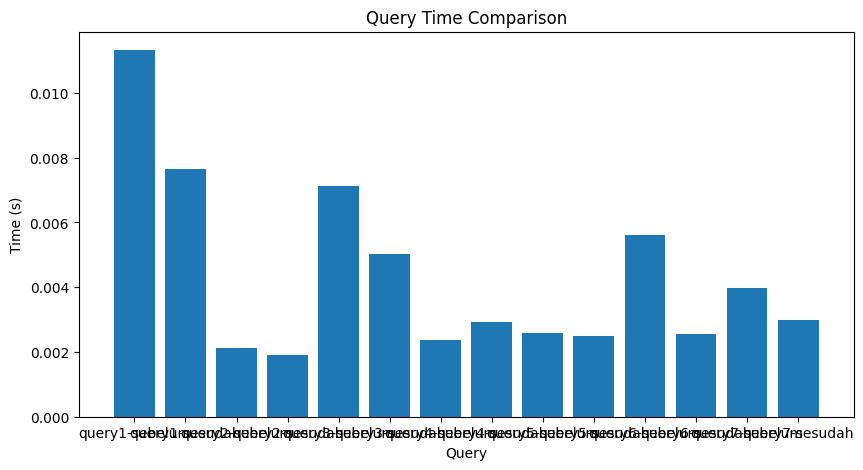

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(dict_time.keys(), dict_time.values())
plt.xticks(rotation=45)
plt.title("Query Time Comparison")
plt.xlabel("Query")
plt.ylabel("Time (s)")
plt.show()